In [35]:
import pandas as pd

In [36]:
final_merged_df = pd.read_csv('final_merged_df_correction.csv')
final_merged_df.head()

,지역별,시점,아파트매매가격지수,인구밀도,사교육참여율,고용률,여성초혼연령,인터넷이용률,합계출산율,근로시간
0,강원,2015.01,82.1,90.2,61.6,51.7,29.62,74.1,1.311,173.1
1,경기,2015.01,89.6,1227.9,71.7,60.8,30.04,86.3,1.272,175.2
2,경남,2015.01,105.3,316.4,65.7,58.3,29.76,86.4,1.437,172.2
3,경북,2015.01,109.4,140.8,64.2,59.2,29.55,86.6,1.464,170.6
4,광주,2015.01,87.7,2998.5,66.0,57.6,30.09,90.2,1.207,171.5


In [37]:
final_merged_df['지역별'].unique()


array(['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '울산', '인천',
       '전남', '전북', '제주', '충남', '충북'], dtype=object)

In [38]:
import numpy as np


# 상관관계 분석

In [39]:
from sklearn.preprocessing import LabelEncoder

# final_merged_df_correction_correction의 상관관계 분석

le = LabelEncoder()
final_merged_df['지역별'] = le.fit_transform(final_merged_df['지역별'])

# 상관관계 계산
corr_matrix = final_merged_df.corr()

# 상관관계 행렬 출력
print("상관관계 행렬:")
print(corr_matrix)

# 가장 높은 상관관계 출력
print("\n가장 높은 상관관계:")
high_corr = corr_matrix.unstack().sort_values(ascending=False).drop_duplicates()
print(high_corr[high_corr < 1].head(10))

# 가장 낮은 상관관계 출력
print("\n가장 낮은 상관관계:")
low_corr = corr_matrix.unstack().sort_values().drop_duplicates()
print(low_corr[low_corr > -1].head(10))




상관관계 행렬:
                    지역별            시점  아파트매매가격지수      인구밀도    사교육참여율  \
지역별        1.000000e+00 -4.946542e-15  -0.084607 -0.040061 -0.279649   
시점        -4.946542e-15  1.000000e+00   0.487528 -0.012754  0.553896   
아파트매매가격지수 -8.460747e-02  4.875283e-01   1.000000  0.362599  0.564785   
인구밀도      -4.006147e-02 -1.275400e-02   0.362599  1.000000  0.474446   
사교육참여율    -2.796492e-01  5.538959e-01   0.564785  0.474446  1.000000   
고용률        3.601939e-01  1.659300e-01  -0.008626 -0.278945 -0.159548   
여성초혼연령    -1.447836e-01  7.581071e-01   0.558722  0.493540  0.796039   
인터넷이용률    -1.967843e-02  5.135267e-01   0.307444  0.147481  0.584262   
합계출산율      1.312285e-01 -8.064331e-01  -0.522546 -0.436920 -0.755705   
근로시간       2.632025e-02 -6.825357e-01  -0.287210  0.040440 -0.345489   

                고용률    여성초혼연령    인터넷이용률     합계출산율      근로시간  
지역별        0.360194 -0.144784 -0.019678  0.131228  0.026320  
시점         0.165930  0.758107  0.513527 -0.806433 -0.682536  
아파트매매가격지수 -0

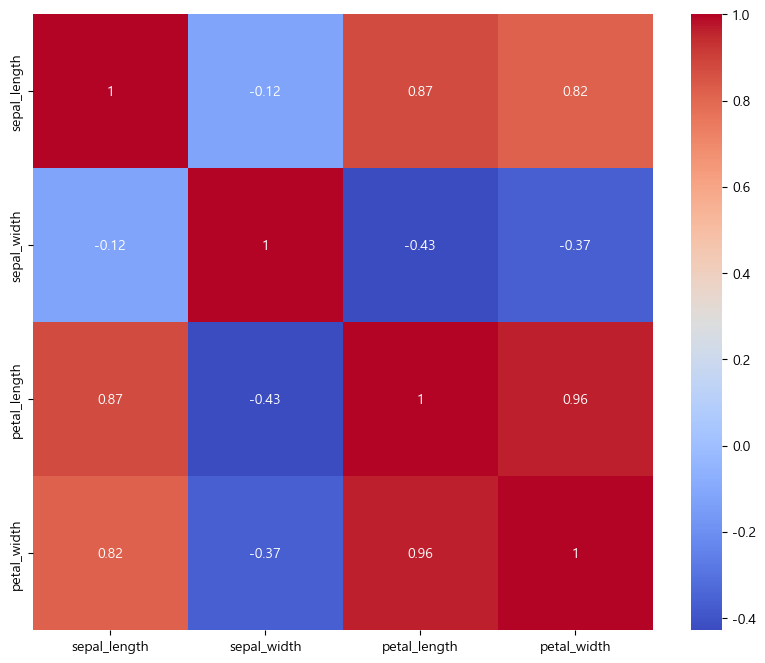

In [69]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import pandas as pd
import numpy as np

# '맑은 고딕' 폰트 경로
font_path = r'C:\Windows\Fonts\malgun.ttf'
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()

# 폰트 경고 제거 설정
plt.rcParams['axes.unicode_minus'] = False

# 예시 데이터 (상관 행렬)
iris = sns.load_dataset('iris')
iris_numeric = iris.select_dtypes(include=[np.number])
corr_matrix = iris_numeric.corr()

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


# 각 도시별 상관관계 분석

In [64]:
city_list = final_merged_df['지역별'].unique()
city_list

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [66]:
# 지역별 상관관계 히트맵 함수
# def corr_relation(city):

#     city_corr_df = final_merged_df.loc[final_merged_df['지역별'] == city].copy()  # 복사본을 만들어줌

    
#     # '지역별' 열 삭제 (inplace=True 없이)
#     city_corr_df = city_corr_df.drop(columns=['지역별'])

#     city_corr_matrix = city_corr_df.corr()

#     plt.figure(figsize=(10, 8))
#     sns.heatmap(city_corr_matrix, annot=True, cmap='coolwarm')
#     plt.title(f'{city} 상관관계 히트맵')
#     plt.show()
# 지역별 숫자와 문자 매핑 딕셔너리 생성
지역_매핑 = {
    0: '강원', 1: '경기', 2: '경남', 3: '경북', 4: '광주',
    5: '대구', 6: '대전', 7: '부산', 8: '서울', 9: '울산',
    10: '인천', 11: '전남', 12: '전북', 13: '제주', 14: '충남', 15: '충북'
}

# 지역별 상관관계 히트맵 함수 수정
def corr_relation(city_num):
    city = 지역_매핑[city_num]
    city_corr_df = final_merged_df.loc[final_merged_df['지역별'] == city_num].copy()
    
    city_corr_df = city_corr_df.drop(columns=['지역별'])

    city_corr_matrix = city_corr_df.corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(city_corr_matrix, annot=True, cmap='coolwarm')
    plt.title(f'{city} 상관관계 히트맵')
    plt.show()

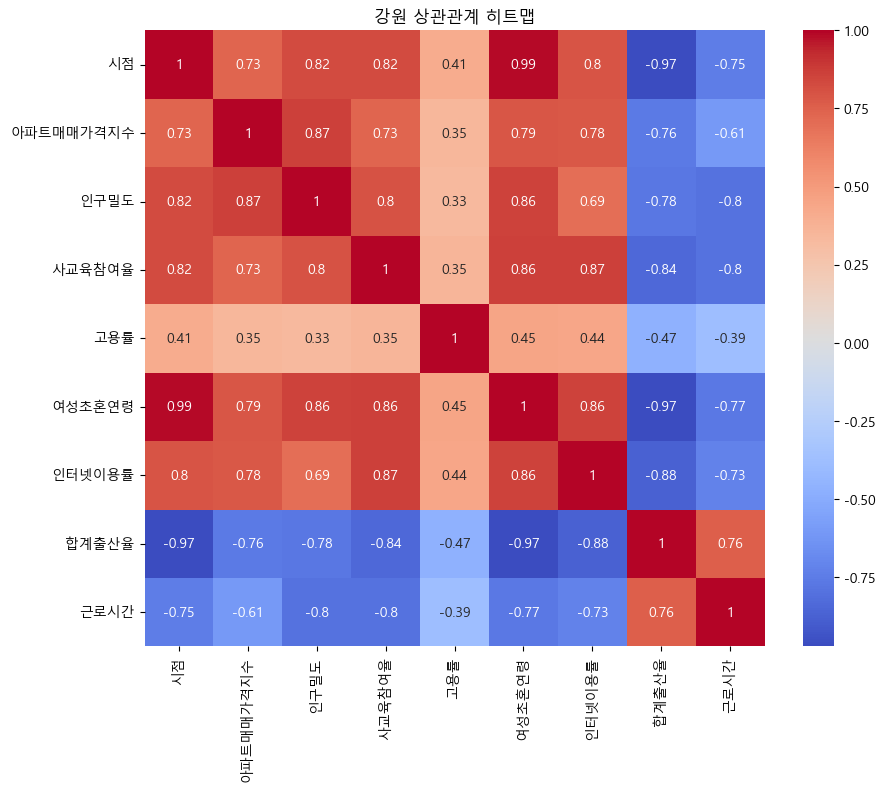

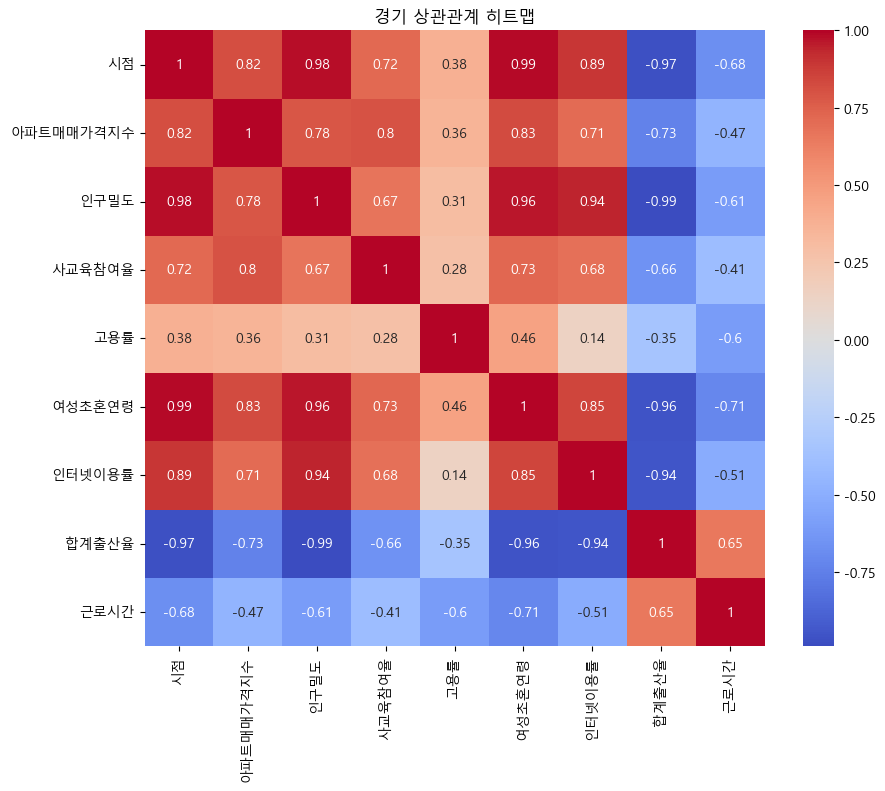

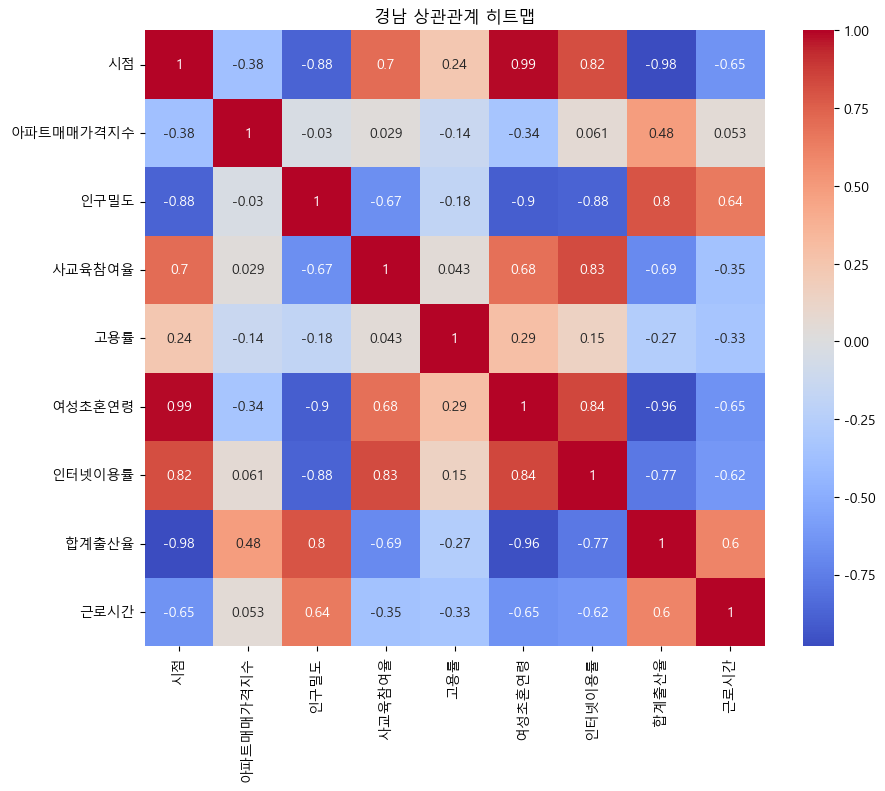

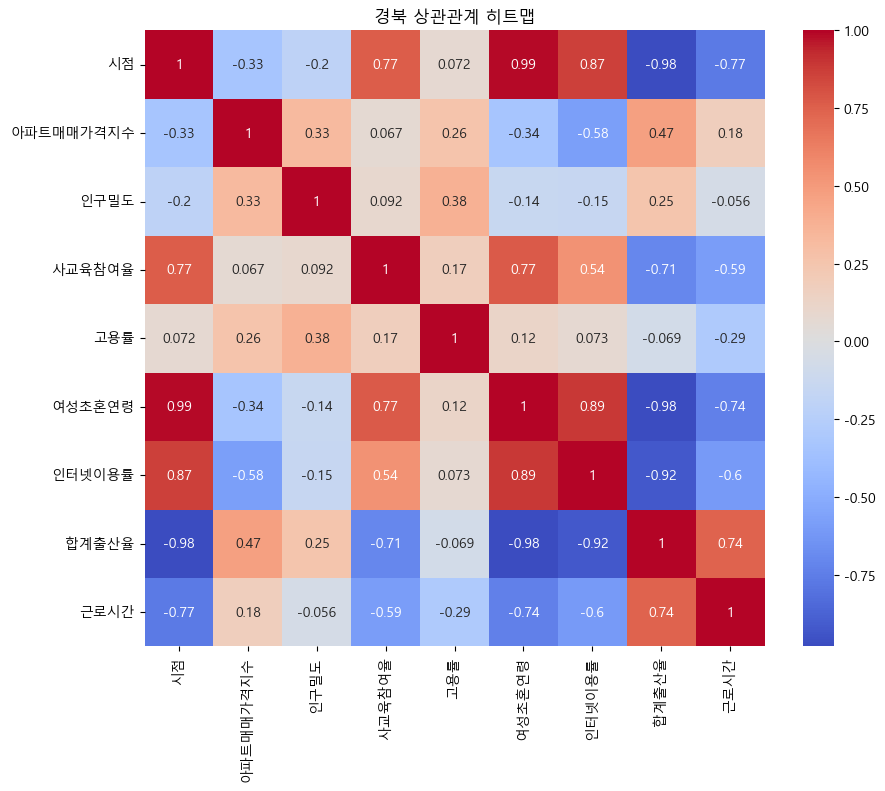

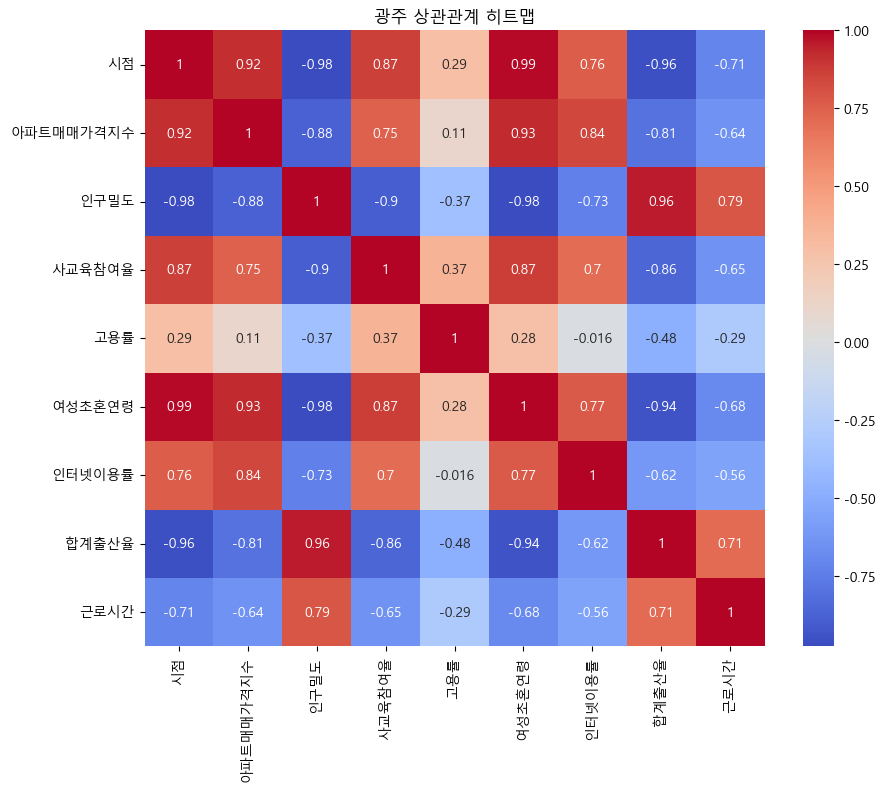

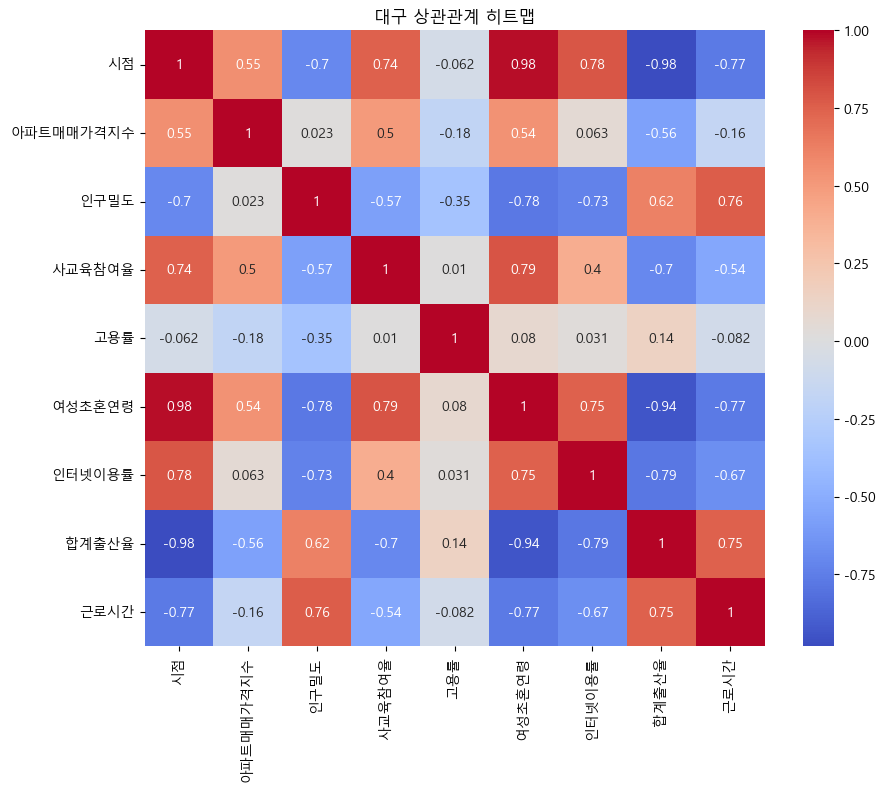

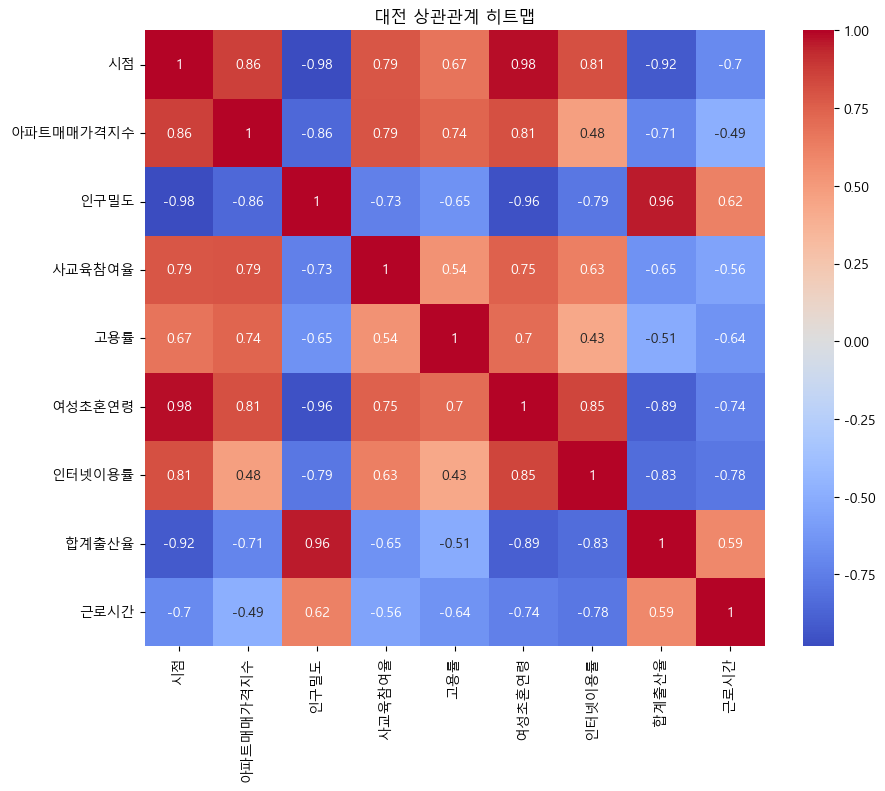

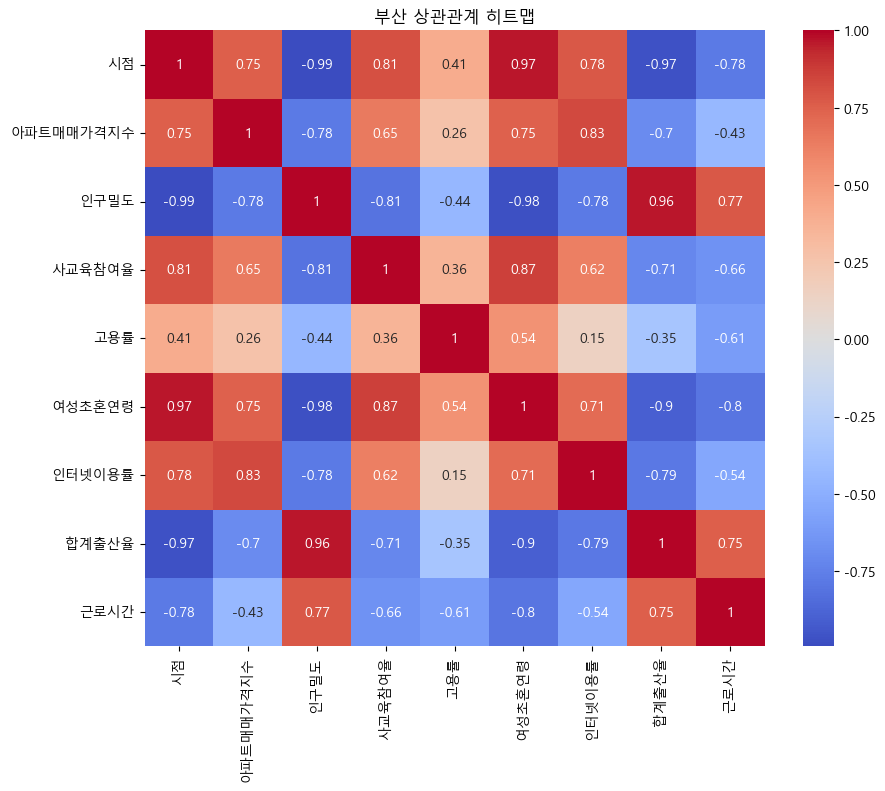

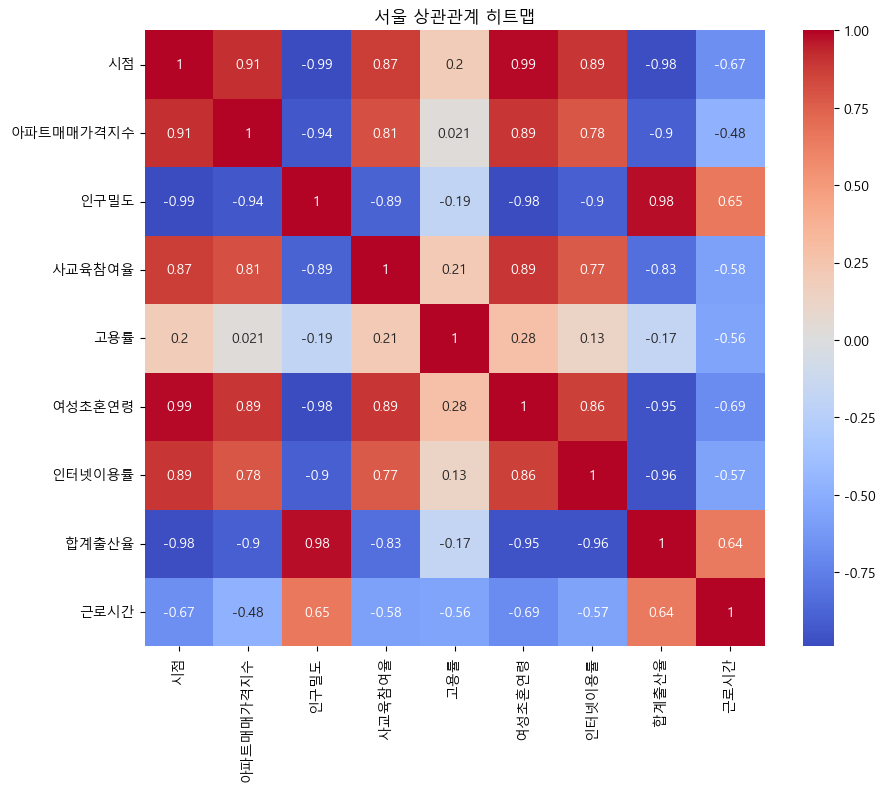

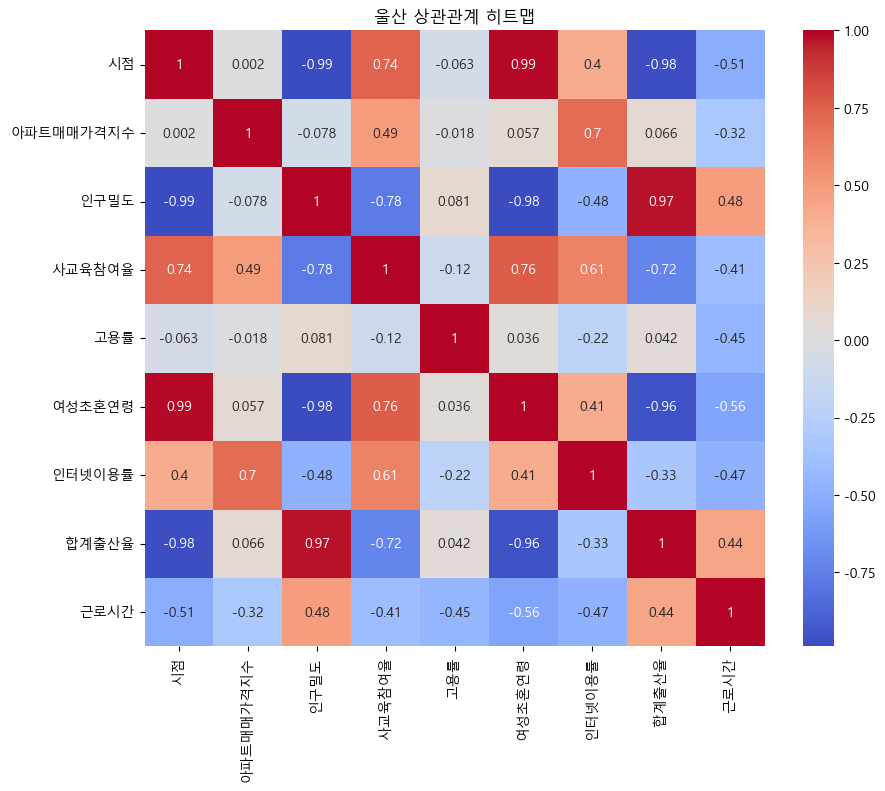

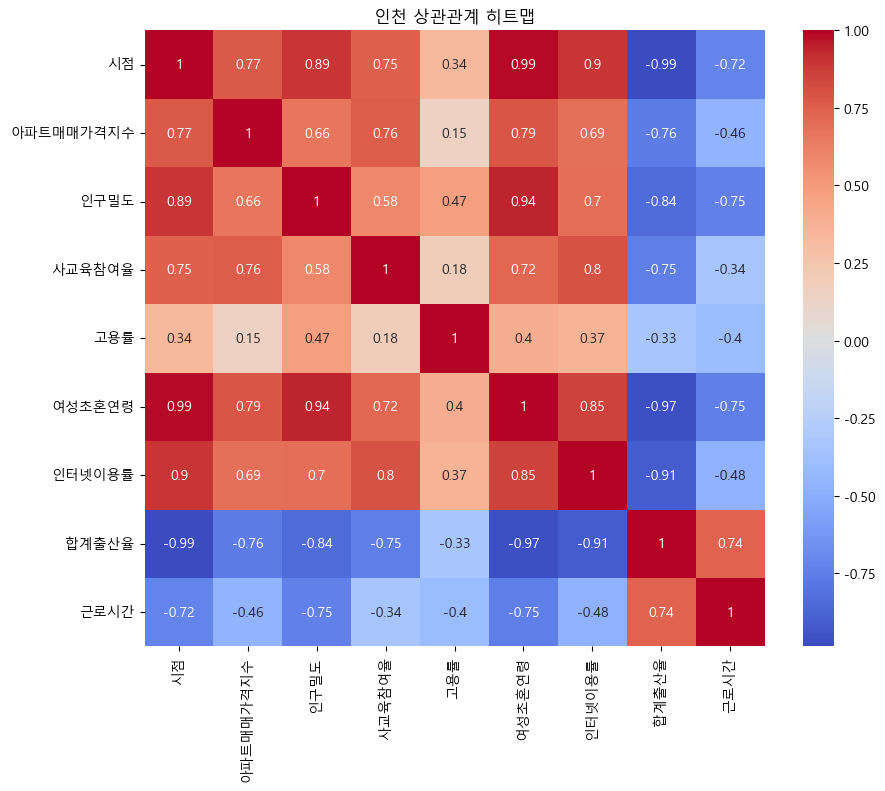

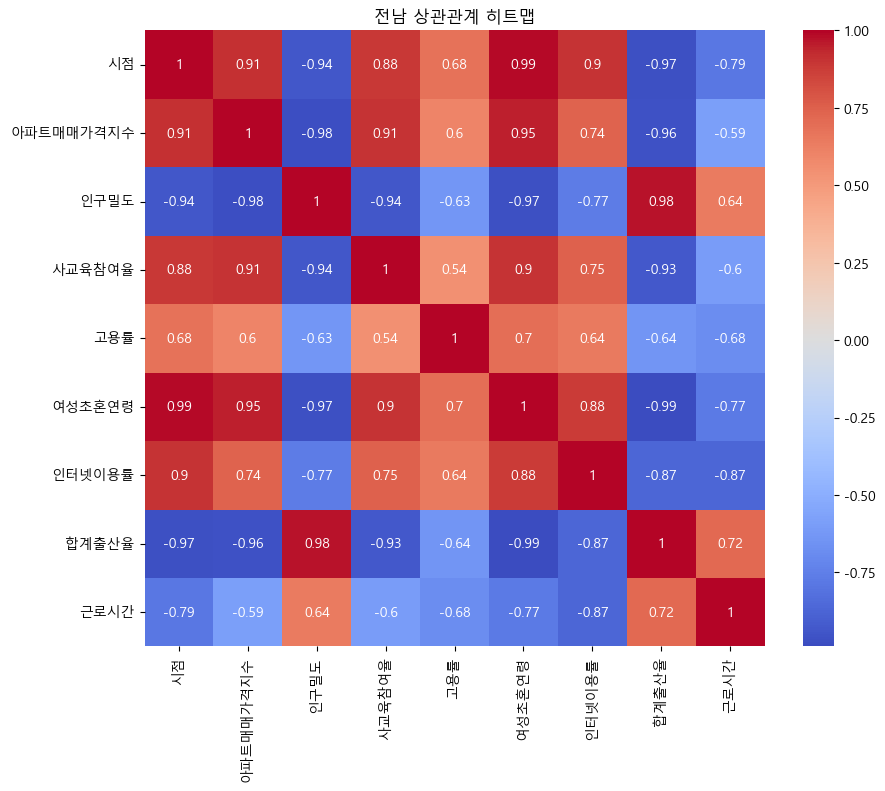

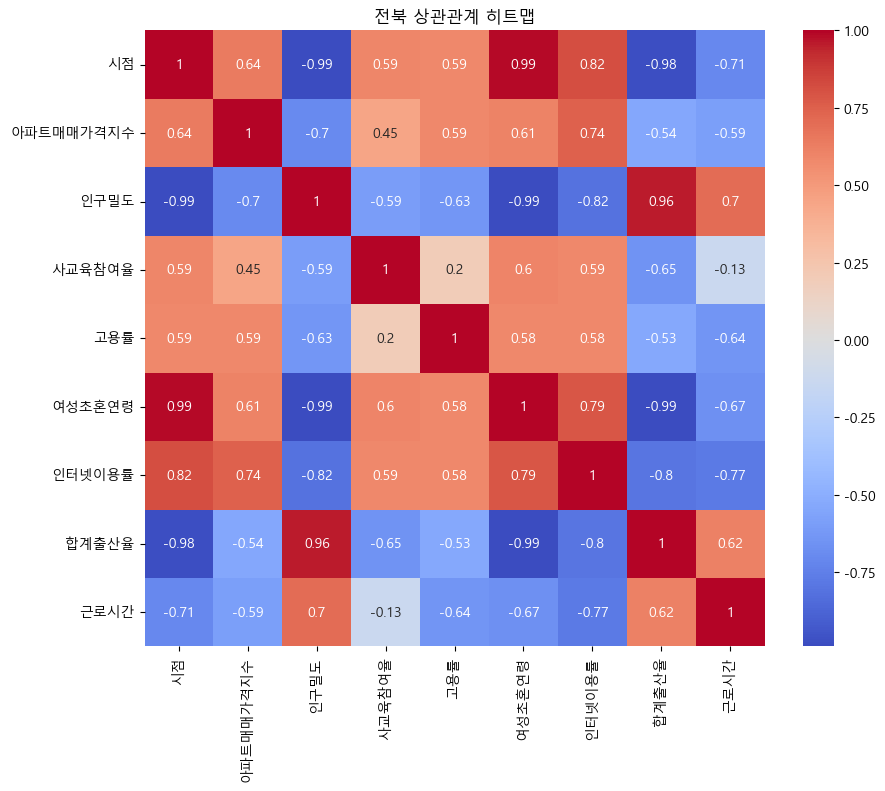

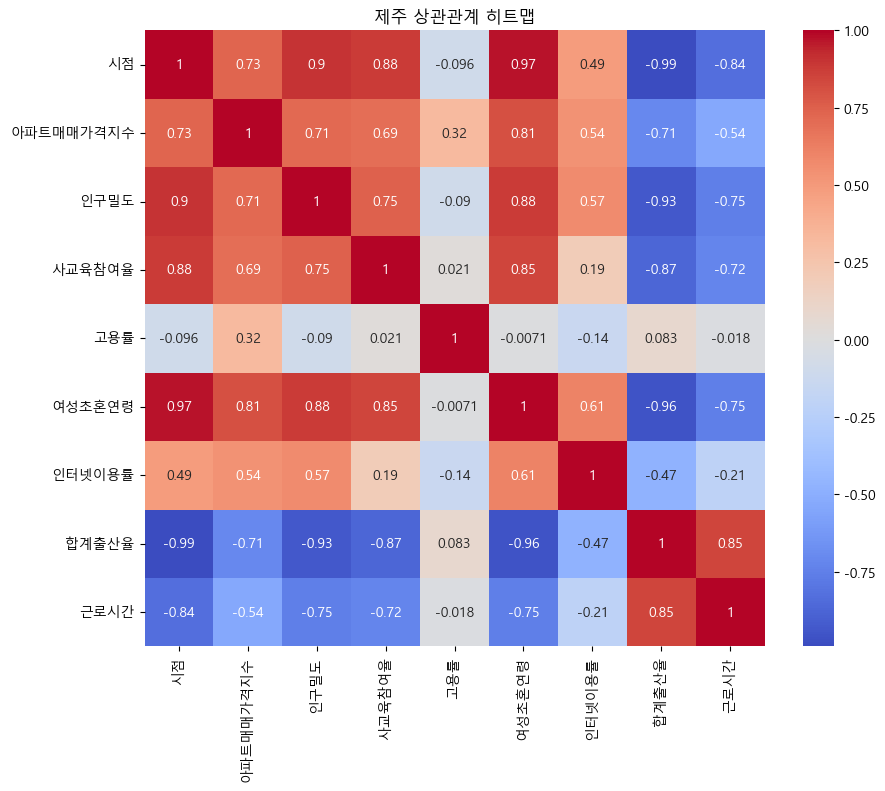

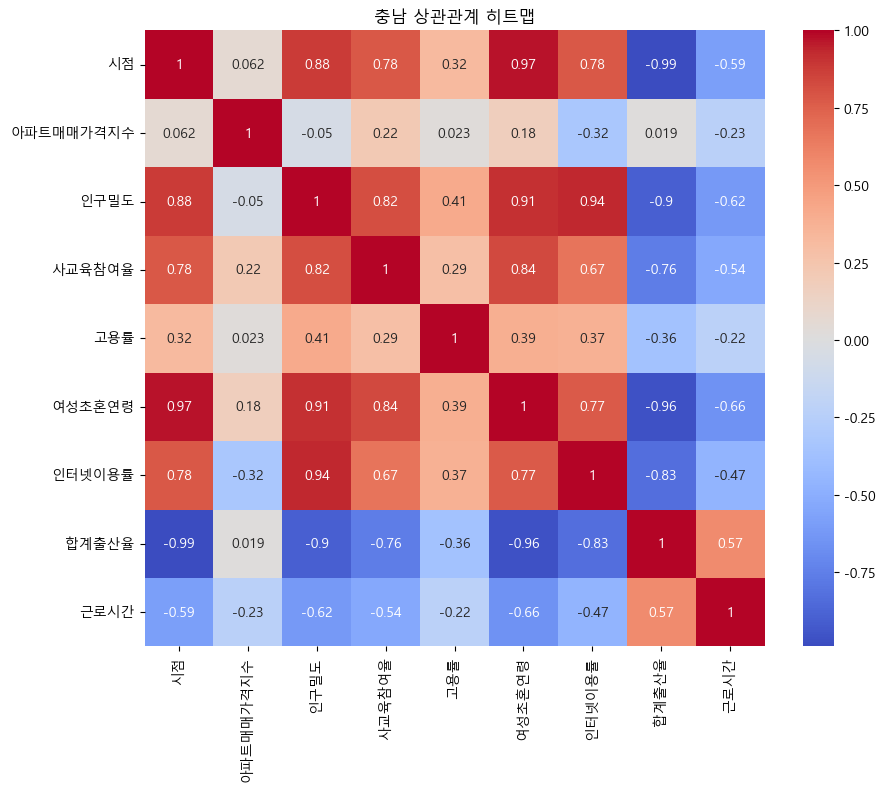

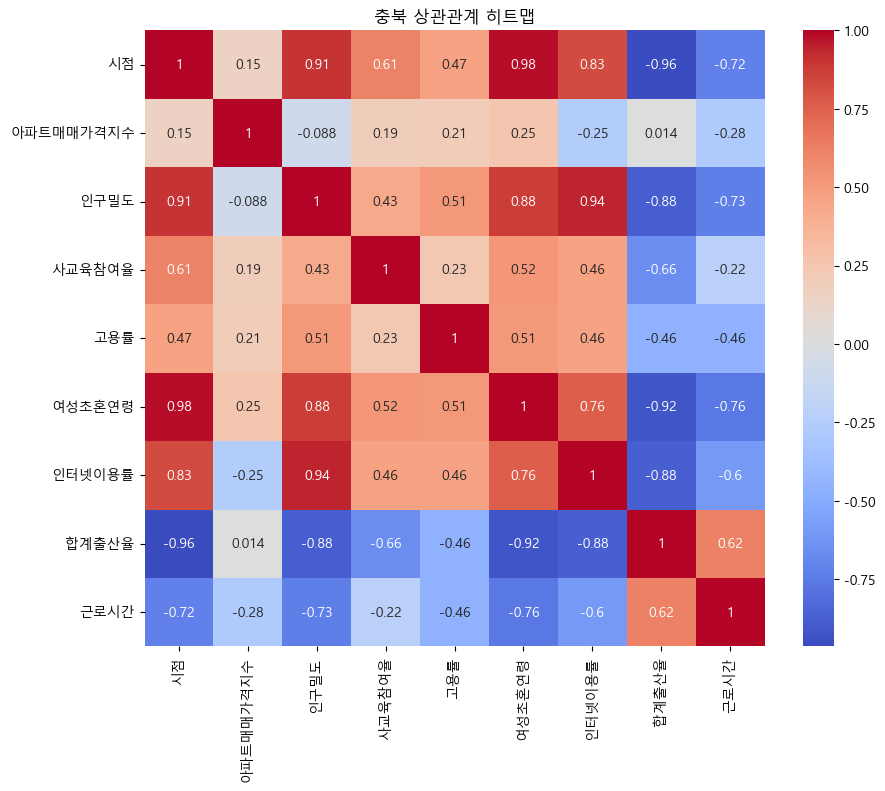

In [70]:
for city in city_list:
    corr_relation(city)

### 머신러닝(회귀분석)

In [44]:

final_merged_df



,지역별,시점,아파트매매가격지수,인구밀도,사교육참여율,고용률,여성초혼연령,인터넷이용률,합계출산율,근로시간
0,0,2015.01,82.1,90.2,61.6,51.7,29.62,74.1,1.311,173.1
1,1,2015.01,89.6,1227.9,71.7,60.8,30.04,86.3,1.272,175.2
2,2,2015.01,105.3,316.4,65.7,58.3,29.76,86.4,1.437,172.2
3,3,2015.01,109.4,140.8,64.2,59.2,29.55,86.6,1.464,170.6
4,4,2015.01,87.7,2998.5,66.0,57.6,30.09,90.2,1.207,171.5
...,...,...,...,...,...,...,...,...,...,...
1723,11,2023.12,107.1,144.1,64.8,64.8,30.85,95.5,0.975,150.4
1724,12,2023.12,107.9,218.4,61.5,61.5,31.12,94.5,0.746,145.8
1725,13,2023.12,108.0,366.0,87.3,69.0,31.68,83.8,0.743,147.4
1726,14,2023.12,104.7,271.5,81.0,62.2,31.31,98.1,0.781,149.4


In [45]:
# 입력변수 & 목표변수 구분하기
X = final_merged_df.drop('합계출산율', axis = 1)
y = final_merged_df['합계출산율']

In [46]:
# 학습데이터 & 테스트데이터 구분
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [47]:
# 스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### 모델평가

In [48]:
#  model 평가 함수
def model_evaluation(model, X_train, X_test, y_train, y_test):
   # MSE
    from sklearn.metrics import mean_squared_error
    y_pred = model.predict(X_test) # y_pred : 수능 문제 푼 결과
    mse = mean_squared_error(y_test, y_pred)
    print("MSE:", mse)

    # r2_score
    from sklearn.metrics import r2_score
    # 수능(테스트) 점수
    y_test_pred = model.predict(X_test) # y_pred : 수능 문제 푼 결과
    test_r2 = r2_score(y_test, y_test_pred)
    print("r2_score:", test_r2)

    y_train_pred = model.predict(X_train) # y_pred : 수능 문제 푼 결과
    train_r2 = r2_score(y_train, y_train_pred)
    print("R-squared:", train_r2)

In [49]:
# 모델 선택(linear regression)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
    # 모델 학습
model.fit(X_train, y_train)

model_evaluation(model, X_train, X_test, y_train, y_test)

MSE: 0.004401735074756491
r2_score: 0.9078169427143898
R-squared: 0.906083138194955


In [50]:
# 모델 선택(KNN)
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()
model.fit(X_train, y_train)
model_evaluation(model, X_train, X_test, y_train, y_test)

MSE: 0.0003467612716763009
r2_score: 0.9927379740878349
R-squared: 0.9966866018195663


In [51]:
# 모델 선택(Decision Tree)
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
model_evaluation(model, X_train, X_test, y_train, y_test)

MSE: 0.00032486416184971116
r2_score: 0.9931965529198755
R-squared: 1.0
